#  메타데이터 분석하기 (2)

**[목차]**
* **데이터 전처리 :** 여러 개의 주행 데이터를 하나의 데이터프레임으로 변환하기
* **데이터 분석 및 시각화 :** 메타데이터 데이터프레임 분석하기


## 1. 데이터 전처리 : 여러 개의 주행 데이터를 하나의 데이터프레임으로 변환하기

이번 실습에서는 한 시나리오에서 생성된 JSON 데이터를 분석하는 실습을 진행

이번 실습에서 분석할 JSON 파일의 개수는 총 50개 이며 각각의 JSON 파일에는 "메타데이터" 와 "어노테이션 데이터"를 가지고 있음


### 1.1 JSON to DataFrame

먼저, JSON 파일을 분석하기 용이하도록 Pandas 데이터프레임으로 변환하는 작업을 진행

이전의 실습에서 하나의 JSON 파일을 분석할 때, 아래와 같이 JSON 파일의 경로를 지정하였음

In [1]:
path = "./data/1656048357884_FR-View-CMR-Wide_2DBB_GT.json"

In [2]:
import json


with open(path, "r") as f :
    data = json.load(f)


data

{'filename': '1656048357884_FR-View-CMR-Wide_Undistorted',
 'parent_path': 'batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/source_image/FR-View-CMR-Wide',
 'unix_timestamp': 1656048357901,
 'file_format': 'png',
 'capacity': 1.83,
 'vehicle_id': 'AIMMO-ADCV1',
 'region_name': '경기 성남시 분당구',
 'location': '구미동 197-1',
 'length': 13,
 'framerate': 30,
 'size': '1920*1024',
 'data_purpose': 'train',
 'time': 'day',
 'road_feature': 'r_cityroad',
 'road_type': 'intersection',
 'location_feature': 'other',
 'driving_scenario': 'left_turn',
 'ego_long_vel_level': 'low',
 'season': 'summer',
 'crowd_level': 'high',
 'scene_att': 'scenario',
 'weather': 'clear',
 'contamination': 'no',
 'cloudiness': 'broken',
 'darkness_level': 'bright',
 'backlight': 'no',
 'road_surface_type': 'asphalt',
 'road_surface_features': 'clear',
 'road_surface_condition': 'clear',
 'shadow_in_line': 'no',
 'damaged_line': 'no',
 'sensor_name': 'FR-View-CMR-Wide',
 'sensor_hfov': 122,
 'sensor_vfov': 74,
 'gps_mode': '

Pandas의 `pd.json_normalize` 를 이용하면 데이터프레임으로 변환할 수 있음

In [3]:
import pandas as pd


df = pd.json_normalize(data)


df

,filename,parent_path,unix_timestamp,file_format,capacity,vehicle_id,region_name,location,length,framerate,...,long_velocity,lat_velocity,long_accel,lat_accel,yaw,roll,pitch,rel_x,rel_y,annotations
0,1656048357884_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048357901,png,1.83,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,22.04,0.31,0.5,-0.32,8.01,0.37,2.58,0.0,0.0,[{'id': '1-00fa7ae8-fa4c-4c10-85cd-a9736dd4606...


하지만 가장 마지막 컬럼을 확인하면 `annotation` 컬럼에 어노테이션 데이터들이 있음

메타데이터를 집중적으로 분석하기 위해서는 해당 컬럼은 불필요하므로 별도의 데이터프레임(annotations_df)으로 분할하는 코드를 작성

In [4]:
# 'annotations'라는 열이 df의 열 목록에 있는지 확인합니다.  
if 'annotations' in df.columns:  

    # 'annotations' 열이 존재하면, 데이터를 'annotations' 열에서 추출하여 JSON 형식으로 펼칩니다.  
    # 'annotations' 열의 데이터를 DataFrame으로 확장합니다.  
    annotations_df = pd.json_normalize(data, 'annotations', sep='_', errors='ignore')  


    # 'annotations' 열을 원래 DataFrame(df)에서 제거합니다.  
    df.drop(columns=['annotations'], inplace=True)  


# 'annotations' 열이 존재하지 않는 경우  
else:  
    # annotations_df를 None으로 설정합니다.  
    annotations_df = None


# 결과 확인
annotations_df

,id,type,label,attribute,points,track_id,occlusion,truncation,scenario,isfake,ismask,area
0,1-00fa7ae8-fa4c-4c10-85cd-a9736dd46062,2dbb,vehicle,bus_l,"[[1251, 227], [1920, 227], [1920, 1024], [1251...",1,0,1,0,0,0,533193
1,3-6858f6d6-c563-4220-b6b5-366197350ea5,2dbb,vehicle,bus_l,"[[970, 647], [1235, 647], [1235, 796], [970, 7...",3,0,0,0,0,0,39485
2,5-3db9dccf-9cba-42c2-a751-811441a644ad,2dbb,vehicle,car,"[[809, 724], [948, 724], [948, 813], [809, 813]]",5,0,0,0,0,0,12371
3,6-882ce571-ab9c-487c-9110-6e210e156175,2dbb,vehicle,car,"[[0, 718], [619, 718], [619, 1024], [0, 1024]]",6,0,1,0,0,0,189414
4,7-19e37dbe-00ca-4c18-9dbd-eb1144c0c5fe,2dbb,vehicle,car,"[[514, 717], [605, 717], [605, 798], [514, 798]]",7,1,0,0,0,0,7371
5,8-255134f5-74f7-46a7-9c0e-ae30e678d1ba,2dbb,vehicle,truck_s,"[[721, 702], [840, 702], [840, 765], [721, 765]]",8,1,0,0,0,0,7497
6,9-6691e66d-288f-47ee-97d5-8daf47e05953,2dbb,vehicle,bus_l,"[[0, 642], [305, 642], [305, 782], [0, 782]]",9,3,2,0,0,0,42700
7,2-09a72304-008a-4ed9-b5b8-103b87782c90,2dbb,traffic_sign,unknown,"[[880, 627], [898, 627], [898, 653], [880, 653]]",301,0,0,0,0,0,468
8,3-d1458a39-906d-47bf-81bf-9a9f92e6d26f,2dbb,traffic_light,traffic_light,"[[853, 645], [875, 645], [875, 652], [853, 652]]",302,0,0,0,0,0,154
9,4-0c00aaa7-4d4c-44fe-b982-db8fdd66119c,2dbb,traffic_light,traffic_light,"[[932, 647], [954, 647], [954, 653], [932, 653]]",303,0,0,0,0,0,132


In [5]:
# 결과 확인 
df

,filename,parent_path,unix_timestamp,file_format,capacity,vehicle_id,region_name,location,length,framerate,...,gps_longitude,long_velocity,lat_velocity,long_accel,lat_accel,yaw,roll,pitch,rel_x,rel_y
0,1656048357884_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048357901,png,1.83,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.108645,22.04,0.31,0.5,-0.32,8.01,0.37,2.58,0.0,0.0


위의 코드까지 실행한 결과, JSON 파일 하나를 메타데이터(`df`)와 어노테이션 데이터(`annotations_df`)를 데이터프레임으로 분할 할 수 있었음


하지만 우리가 분석해야 할 데이터는 한 시나리오에 있는 50개의 JSON 파일


위의 코드를 이용하여 함수로 만들면 손쉽게 JSON 파일의 데이터 분할, 데이퍼프레임 변환까지 작업 가능

In [6]:
def json_to_dataframe(file_path):

    # 주어진 파일 경로에서 JSON 파일을 열고 데이터를 읽어옴
    with open(file_path, 'r') as file:
        data = json.load(file)


    # annotations를 제외한 모든 데이터를 포함하는 데이터프레임 생성
    df = pd.json_normalize(data)

    
    # 'annotations'라는 열이 df의 열 목록에 있는지 확인
    if 'annotations' in df.columns:
        
        # 'annotations' 열이 존재하면, 데이터를 'annotations' 열에서 추출하여 JSON 형식으로 펼침
        annotations_df = pd.json_normalize(data, 'annotations', sep='_', errors='ignore')

        # 'annotations' 열을 원래 DataFrame(df)에서 제거
        df.drop(columns=['annotations'], inplace=True)
    
    else:
        # 'annotations' 열이 존재하지 않는 경우, annotations_df를 None으로 설정
        annotations_df = None

    
    return df, annotations_df

하나의 JSON 파일을 이용하여 테스트하면 `df` 에는 메타데이터가 `annotation_df` 에는 어노테이션 데이터가 있는 것을 확인 할 수 있음

In [7]:
df, annotations_df = json_to_dataframe(path)


# 결과 확인
df

,filename,parent_path,unix_timestamp,file_format,capacity,vehicle_id,region_name,location,length,framerate,...,gps_longitude,long_velocity,lat_velocity,long_accel,lat_accel,yaw,roll,pitch,rel_x,rel_y
0,1656048357884_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048357901,png,1.83,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.108645,22.04,0.31,0.5,-0.32,8.01,0.37,2.58,0.0,0.0


In [8]:
# 결과 확인
annotations_df

,id,type,label,attribute,points,track_id,occlusion,truncation,scenario,isfake,ismask,area
0,1-00fa7ae8-fa4c-4c10-85cd-a9736dd46062,2dbb,vehicle,bus_l,"[[1251, 227], [1920, 227], [1920, 1024], [1251...",1,0,1,0,0,0,533193
1,3-6858f6d6-c563-4220-b6b5-366197350ea5,2dbb,vehicle,bus_l,"[[970, 647], [1235, 647], [1235, 796], [970, 7...",3,0,0,0,0,0,39485
2,5-3db9dccf-9cba-42c2-a751-811441a644ad,2dbb,vehicle,car,"[[809, 724], [948, 724], [948, 813], [809, 813]]",5,0,0,0,0,0,12371
3,6-882ce571-ab9c-487c-9110-6e210e156175,2dbb,vehicle,car,"[[0, 718], [619, 718], [619, 1024], [0, 1024]]",6,0,1,0,0,0,189414
4,7-19e37dbe-00ca-4c18-9dbd-eb1144c0c5fe,2dbb,vehicle,car,"[[514, 717], [605, 717], [605, 798], [514, 798]]",7,1,0,0,0,0,7371
5,8-255134f5-74f7-46a7-9c0e-ae30e678d1ba,2dbb,vehicle,truck_s,"[[721, 702], [840, 702], [840, 765], [721, 765]]",8,1,0,0,0,0,7497
6,9-6691e66d-288f-47ee-97d5-8daf47e05953,2dbb,vehicle,bus_l,"[[0, 642], [305, 642], [305, 782], [0, 782]]",9,3,2,0,0,0,42700
7,2-09a72304-008a-4ed9-b5b8-103b87782c90,2dbb,traffic_sign,unknown,"[[880, 627], [898, 627], [898, 653], [880, 653]]",301,0,0,0,0,0,468
8,3-d1458a39-906d-47bf-81bf-9a9f92e6d26f,2dbb,traffic_light,traffic_light,"[[853, 645], [875, 645], [875, 652], [853, 652]]",302,0,0,0,0,0,154
9,4-0c00aaa7-4d4c-44fe-b982-db8fdd66119c,2dbb,traffic_light,traffic_light,"[[932, 647], [954, 647], [954, 653], [932, 653]]",303,0,0,0,0,0,132


### 1.2. 여러 개의 주행 데이터에서 메타데이터를 이용한 데이터프레임 생성하기

위에서 정의한 함수 `json_to_dataframe` 을 사용하여 시나리오 전체의 메타데이터 데이터프레임을 만드는 작업 진행

이를 위해서는 JSON 파일들의 이름(파일경로)이 필요

#### (1) os 라이브러리를 이용한 방법

os 라이브러리를 사용하면 폴더 안에 어떤 파일들이 있는지 확인하여 리스트 형태로 확인 할 수 있음

In [9]:
import os

scenario_folder = "./data"

os.listdir(scenario_folder)

['1656048359286_FR-View-CMR-Wide_2DBB_GT.json',
 '1656048362884_FR-View-CMR-Wide_2DBB_GT.json',
 '1656048359084_FR-View-CMR-Wide_2DBB_GT.json',
 '1656048366884_FR-View-CMR-Wide_2DBB_GT.json',
 '1656048365684_FR-View-CMR-Wide_2DBB_GT.json',
 '1656048364484_FR-View-CMR-Wide_2DBB_GT.json',
 '1656048366084_FR-View-CMR-Wide_2DBB_GT.json',
 '1656048358889_FR-View-CMR-Wide_2DBB_GT.json',
 '1656048361684_FR-View-CMR-Wide_2DBB_GT.json',
 '1656048367284_FR-View-CMR-Wide_2DBB_GT.json',
 '1656048363689_FR-View-CMR-Wide_2DBB_GT.json',
 '1656048360284_FR-View-CMR-Wide_2DBB_GT.json',
 '1656048361286_FR-View-CMR-Wide_2DBB_GT.json',
 '1656048361084_FR-View-CMR-Wide_2DBB_GT.json',
 '1656048358088_FR-View-CMR-Wide_2DBB_GT.json',
 '1656048363484_FR-View-CMR-Wide_2DBB_GT.json',
 '1656048362684_FR-View-CMR-Wide_2DBB_GT.json',
 '1656048367087_FR-View-CMR-Wide_2DBB_GT.json',
 '1656048361884_FR-View-CMR-Wide_2DBB_GT.json',
 '1656048364292_FR-View-CMR-Wide_2DBB_GT.json',
 '1656048363285_FR-View-CMR-Wide_2DBB_GT

이 결과물을 이용하는 방법도 있지만 다른 방법도 소개 

####  (2) glob 라이브러리를 이용한 방법 

`os` 라이브러리를 이용하여 `data` 폴더에 있는 내용을 확인한 결과, 파일의 이름에 어떠한 규칙이 있는 것을 확인 할 수 있음

* **규칙1 :** 파일 이름의 시작은 어떠한 숫자 13가지로 구성됨
* **규칙2 :** 띄어쓰기 대신 언더바(_)로 구분이 되어 있음
* **규칙3 :** 규칙1 이후에는 같은 텍스트로 구성되어 있음


이 규칙을 이용하면 아래와 같은 패턴을 만들 수 있음

여기에서 `*` 은 와일드카드라고 해서 **0개 이상의 임의의 문자와 일치한다**는 의미를 가짐

즉, 이 부분은 어떤 문자열이든지 매칭될 수 있음을 의미

In [10]:
# JSON 파일들의 경로를 매칭하는 패턴
scenario_folder = './data/*_FR-View-CMR-Wide_2DBB_GT.json'

`glob` 라이브러리는 특정 패턴과 일치하는 파일 및 디렉토리(폴더)를 찾기 위해 사용되는 내장 라이브러리 중 하나

`glob` 라이브러리의 `glob` 메소드는 지정된 패턴에 일치하는 파일 경로의 리스트를 반환

아래의 코드를 실행하면 현재 폴더에서 이름의 여부는 상관없이 `.py` 인 모든 Python 파일을 찾음

In [11]:
import glob

python_files = glob.glob('*.py')  
print(python_files)

['glob_test.py', 'test_glob.py']


In [12]:
# 패턴과 일치하는 모든 파일 찾기
file_paths = glob.glob(scenario_folder)
file_paths

['./data/1656048359286_FR-View-CMR-Wide_2DBB_GT.json',
 './data/1656048362884_FR-View-CMR-Wide_2DBB_GT.json',
 './data/1656048359084_FR-View-CMR-Wide_2DBB_GT.json',
 './data/1656048366884_FR-View-CMR-Wide_2DBB_GT.json',
 './data/1656048365684_FR-View-CMR-Wide_2DBB_GT.json',
 './data/1656048364484_FR-View-CMR-Wide_2DBB_GT.json',
 './data/1656048366084_FR-View-CMR-Wide_2DBB_GT.json',
 './data/1656048358889_FR-View-CMR-Wide_2DBB_GT.json',
 './data/1656048361684_FR-View-CMR-Wide_2DBB_GT.json',
 './data/1656048367284_FR-View-CMR-Wide_2DBB_GT.json',
 './data/1656048363689_FR-View-CMR-Wide_2DBB_GT.json',
 './data/1656048360284_FR-View-CMR-Wide_2DBB_GT.json',
 './data/1656048361286_FR-View-CMR-Wide_2DBB_GT.json',
 './data/1656048361084_FR-View-CMR-Wide_2DBB_GT.json',
 './data/1656048358088_FR-View-CMR-Wide_2DBB_GT.json',
 './data/1656048363484_FR-View-CMR-Wide_2DBB_GT.json',
 './data/1656048362684_FR-View-CMR-Wide_2DBB_GT.json',
 './data/1656048367087_FR-View-CMR-Wide_2DBB_GT.json',
 './data/1

이 데이터와 위에서 정의한 `json_to_dataframe` 함수를 이용하여 메타데이터 데이터프레임을 생성

In [13]:
# 데이터프레임 초기화
all_dfs = []
all_annotations_dfs = []


# file_paths 리스트에 있는 모든 파일 경로에 대해 반복  
for path in file_paths:

    # json_to_dataframe 함수를 호출하여 각 파일의 DataFrame과 annotations DataFrame을 생성
    new_df, new_annotations_df = json_to_dataframe(path)

    # 생성된 DataFrame을 all_dfs 리스트에 추가
    all_dfs.append(new_df)
    

    # annotations DataFrame이 None이 아닌 경우에만 all_annotations_dfs 리스트에 추가
    if new_annotations_df is not None:
        all_annotations_dfs.append(new_annotations_df)



# 모든 DataFrame을 하나로 병합, 인덱스는 무시하고 연속적인 숫자로 다시 설정
merged_df = pd.concat(all_dfs, ignore_index=True)
merged_annotations_df = pd.concat(all_annotations_dfs, ignore_index=True)


# 결과 확인
merged_df

,filename,parent_path,unix_timestamp,file_format,capacity,vehicle_id,region_name,location,length,framerate,...,gps_longitude,long_velocity,lat_velocity,long_accel,lat_accel,yaw,roll,pitch,rel_x,rel_y
0,1656048359286_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048359295,png,1.88,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.108743,23.58,0.44,0.19,-0.77,13.95,0.41,2.15,0.0,0.0
1,1656048362884_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048362886,png,2.12,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.108973,25.34,0.33,0.16,-2.48,60.43,1.65,2.79,0.0,0.0
2,1656048359084_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048359086,png,1.88,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.108728,23.45,0.39,0.78,-0.34,12.65,0.22,2.38,0.0,0.0
3,1656048366884_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048366895,png,2.26,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.108985,25.64,-0.35,-0.47,-0.01,99.77,359.49,2.07,0.0,0.0
4,1656048365684_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048365680,png,2.26,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.109002,26.68,-0.24,0.25,-0.30,98.94,0.32,2.07,0.0,0.0
5,1656048364484_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048364490,png,2.30,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.109008,26.11,0.00,0.06,-2.19,87.56,1.09,2.16,0.0,0.0
6,1656048366084_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048366093,png,2.24,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.108996,26.69,-0.33,-0.24,-0.03,99.64,0.08,2.17,0.0,0.0
7,1656048358889_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048358877,png,1.88,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.108713,23.19,0.46,0.12,-0.52,11.49,0.21,2.66,0.0,0.0
8,1656048361684_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048361701,png,2.01,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.108911,24.54,0.33,-0.03,-1.65,37.87,0.13,0.93,0.0,0.0
9,1656048367284_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048367279,png,2.30,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.108980,24.93,-0.26,-0.55,-0.01,99.59,0.01,1.92,0.0,0.0


### 1.3. 데이터프레임 확인하기

최근 차량에 탑재된 센서는 정확도도 높으며 안정적인 데이터를 수집할 수 있지만 그렇다고 완전히 무결하다고 할 수 없음

결측치가 있거나 혹은 정렬이 다른 규칙으로 정렬되어 있을 수도 있음

그래서 해당 데이터를 확인(검증)하는 절차를 진행


#### (1) 결측치 확인하기

`.isnull().sum()`을 사용한 결과 결측치는 확인되지 않았음

In [14]:
merged_df.isnull().sum()

filename                  0
parent_path               0
unix_timestamp            0
file_format               0
capacity                  0
vehicle_id                0
region_name               0
location                  0
length                    0
framerate                 0
size                      0
data_purpose              0
time                      0
road_feature              0
road_type                 0
location_feature          0
driving_scenario          0
ego_long_vel_level        0
season                    0
crowd_level               0
scene_att                 0
weather                   0
contamination             0
cloudiness                0
darkness_level            0
backlight                 0
road_surface_type         0
road_surface_features     0
road_surface_condition    0
shadow_in_line            0
damaged_line              0
sensor_name               0
sensor_hfov               0
sensor_vfov               0
gps_mode                  0
gps_latitude        

#### (2) 정렬 확인하기

현재 데이터에서 정렬의 기준이 될 수 있는 것은 많음

하지만 데이터 분석을 하는 입장에서 다양한 센서 데이터를 확인 할 때, 용이한 건 **시간에 따른 정렬**임

그래서 데이터프레임의 `unix_timestamp` 를 기준으로 확인

In [15]:
# 원래의 데이터프레임
merged_df["unix_timestamp"]

0     1656048359295
1     1656048362886
2     1656048359086
3     1656048366895
4     1656048365680
5     1656048364490
6     1656048366093
7     1656048358877
8     1656048361701
9     1656048367279
10    1656048363688
11    1656048360271
12    1656048361282
13    1656048361073
14    1656048358075
15    1656048363479
16    1656048362677
17    1656048367104
18    1656048361875
19    1656048364281
20    1656048363269
21    1656048359679
22    1656048365501
23    1656048362084
24    1656048359888
25    1656048361492
26    1656048366268
27    1656048360690
28    1656048358493
29    1656048364699
30    1656048366689
31    1656048362299
32    1656048363100
33    1656048367488
34    1656048358284
35    1656048367697
36    1656048360480
37    1656048363897
38    1656048359470
39    1656048364873
40    1656048358668
41    1656048357901
42    1656048360899
43    1656048362468
44    1656048364071
45    1656048365082
46    1656048365292
47    1656048360097
48    1656048366477
49    1656048365884


`sort_values()` 메소드를 사용하여 정렬한 결과, 기존의 정렬 순서와는 차이를 보이고 있음

In [16]:
merged_df["unix_timestamp"].sort_values()

41    1656048357901
14    1656048358075
34    1656048358284
28    1656048358493
40    1656048358668
7     1656048358877
2     1656048359086
0     1656048359295
38    1656048359470
21    1656048359679
24    1656048359888
47    1656048360097
11    1656048360271
36    1656048360480
27    1656048360690
42    1656048360899
13    1656048361073
12    1656048361282
25    1656048361492
8     1656048361701
18    1656048361875
23    1656048362084
31    1656048362299
43    1656048362468
16    1656048362677
1     1656048362886
32    1656048363100
20    1656048363269
15    1656048363479
10    1656048363688
37    1656048363897
44    1656048364071
19    1656048364281
5     1656048364490
29    1656048364699
39    1656048364873
45    1656048365082
46    1656048365292
22    1656048365501
4     1656048365680
49    1656048365884
6     1656048366093
26    1656048366268
48    1656048366477
30    1656048366689
3     1656048366895
17    1656048367104
9     1656048367279
33    1656048367488
35    1656048367697


참고로 `sort_values` 메서드와 `reset_index(drop=True)` 을 같이 사용하면 정렬에 의해 섞여버린 인덱스를 초기화 할 수있음

In [17]:
merged_df["unix_timestamp"].sort_values().reset_index(drop=True)

0     1656048357901
1     1656048358075
2     1656048358284
3     1656048358493
4     1656048358668
5     1656048358877
6     1656048359086
7     1656048359295
8     1656048359470
9     1656048359679
10    1656048359888
11    1656048360097
12    1656048360271
13    1656048360480
14    1656048360690
15    1656048360899
16    1656048361073
17    1656048361282
18    1656048361492
19    1656048361701
20    1656048361875
21    1656048362084
22    1656048362299
23    1656048362468
24    1656048362677
25    1656048362886
26    1656048363100
27    1656048363269
28    1656048363479
29    1656048363688
30    1656048363897
31    1656048364071
32    1656048364281
33    1656048364490
34    1656048364699
35    1656048364873
36    1656048365082
37    1656048365292
38    1656048365501
39    1656048365680
40    1656048365884
41    1656048366093
42    1656048366268
43    1656048366477
44    1656048366689
45    1656048366895
46    1656048367104
47    1656048367279
48    1656048367488
49    1656048367697


이를 이용하여 `unix_timestamp` 을 기준으로 정렬하고 인덱스 초기화를 진행

In [18]:
sorted_df = merged_df.sort_values(by='unix_timestamp').reset_index(drop=True)
sorted_df

,filename,parent_path,unix_timestamp,file_format,capacity,vehicle_id,region_name,location,length,framerate,...,gps_longitude,long_velocity,lat_velocity,long_accel,lat_accel,yaw,roll,pitch,rel_x,rel_y
0,1656048357884_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048357901,png,1.83,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.108645,22.04,0.31,0.50,-0.32,8.01,0.37,2.58,0.0,0.0
1,1656048358088_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048358075,png,1.83,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.108656,22.33,0.39,0.43,0.02,8.34,0.03,2.32,0.0,0.0
2,1656048358297_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048358284,png,1.85,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.108671,22.59,0.43,0.09,-0.67,8.98,0.31,2.26,0.0,0.0
3,1656048358487_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048358493,png,1.86,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.108686,22.83,0.38,0.23,-0.30,9.66,0.30,2.40,0.0,0.0
4,1656048358684_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048358668,png,1.87,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.108698,22.96,0.43,-0.31,-0.58,10.42,0.19,2.52,0.0,0.0
5,1656048358889_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048358877,png,1.88,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.108713,23.19,0.46,0.12,-0.52,11.49,0.21,2.66,0.0,0.0
6,1656048359084_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048359086,png,1.88,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.108728,23.45,0.39,0.78,-0.34,12.65,0.22,2.38,0.0,0.0
7,1656048359286_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048359295,png,1.88,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.108743,23.58,0.44,0.19,-0.77,13.95,0.41,2.15,0.0,0.0
8,1656048359484_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048359470,png,1.88,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.108756,23.72,0.42,0.35,-0.40,15.07,0.12,2.65,0.0,0.0
9,1656048359684_FR-View-CMR-Wide_Undistorted,batch_02_data/2022-06-24_14-25-57_ADCV1-ADP1/s...,1656048359679,png,1.88,AIMMO-ADCV1,경기 성남시 분당구,구미동 197-1,13,30,...,127.108771,23.97,0.52,-0.01,-0.80,16.64,0.40,2.36,0.0,0.0


`equals` 메서드를 통해 두 컬럼을 비교하면 같은 것을 확인할 수 있음

In [19]:
sorted_df['unix_timestamp'].equals(merged_df["unix_timestamp"].sort_values().reset_index(drop=True))

True

## 2. 데이터 분석 및 시각화 : 메타데이터 데이터프레임 분석하기

메타데이터 데이터프레임(`sorted_df`)의 데이터를 이용하여 분석을 진행

`조향` 데이터와 `속도`, `이동경로`를 중심으로 살펴 볼 예정


### 2.1. 조향 데이터 분석하기

조향 데이터는 Yaw, Roll, Pitch가 있으며 해당 데이터를 시간 순으로 확인하면 다음과 같음

In [20]:
sorted_df[["unix_timestamp", "yaw", "roll", "pitch"]]

,unix_timestamp,yaw,roll,pitch
0,1656048357901,8.01,0.37,2.58
1,1656048358075,8.34,0.03,2.32
2,1656048358284,8.98,0.31,2.26
3,1656048358493,9.66,0.30,2.40
4,1656048358668,10.42,0.19,2.52
5,1656048358877,11.49,0.21,2.66
6,1656048359086,12.65,0.22,2.38
7,1656048359295,13.95,0.41,2.15
8,1656048359470,15.07,0.12,2.65
9,1656048359679,16.64,0.40,2.36


세 데이터의 상관관계가 있는지 확인한 결과, 눈에 띄는 특징은 발견할 수 없었음

In [21]:
sorted_df[["yaw", "roll", "pitch"]].corr()

,yaw,roll,pitch
yaw,1.000000,0.157068,0.129747
roll,0.157068,1.000000,-0.294207
pitch,0.129747,-0.294207,1.000000


데이터 분석이 용이하도록 각 변수에 저장

In [22]:
roll = sorted_df['roll']
pitch = sorted_df['pitch']
yaw = sorted_df['yaw']

현재의 상태로는 어떠한 정보를 파악하기가 어려움으로 시각화를 통해 데이터의 특징을 확인

In [23]:
# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

아래의 코드를 이용하여 Yaw, Roll, Pitch 의 각각의 선 그래프를 생성한 결과

* **Yaw (파랑) :** 점진적으로 값이 상승하는 그래프
* **Roll (초록) :** 특정 위치에서 극단적으로 값이 변동하는 그래프
* **Pitch (빨강) :** 어떠한 눈에 띄는 패턴이 보이지 않는 그래프

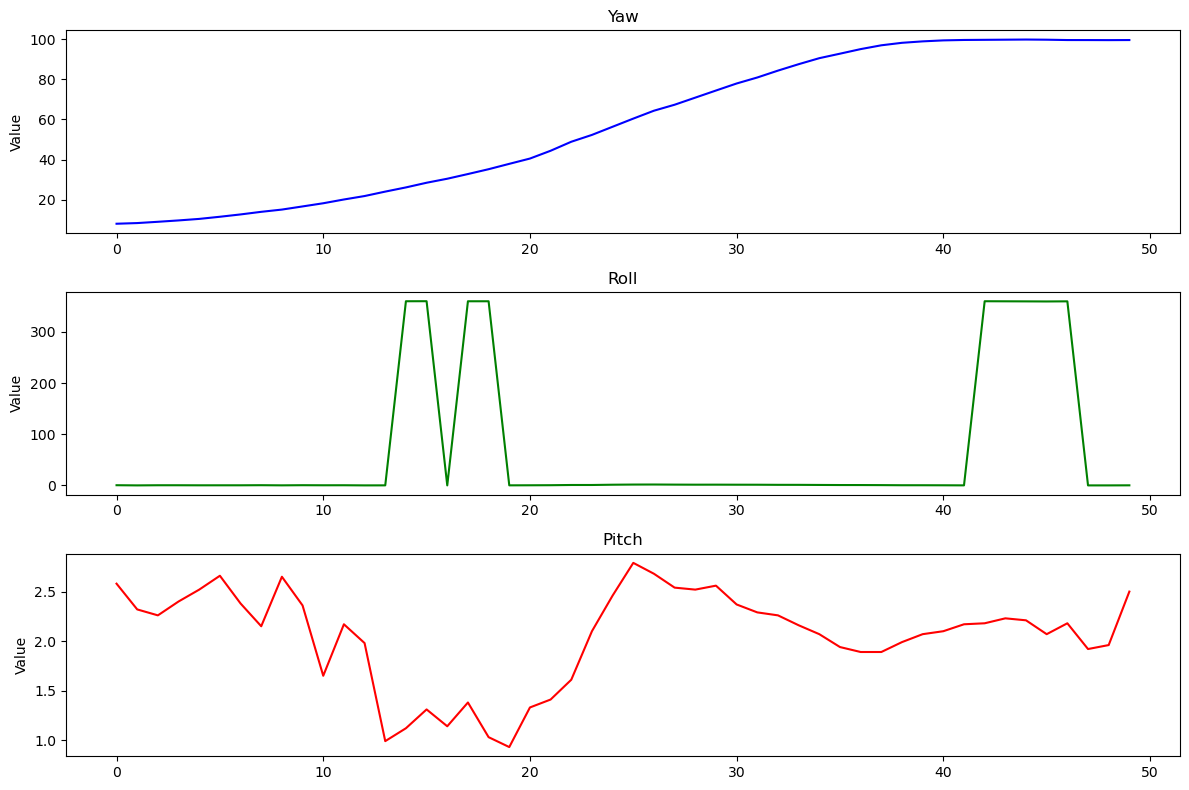

In [24]:
# 그래프 생성
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

axs[0].plot(yaw, color='blue')

axs[0].set_title('Yaw')
axs[0].set_ylabel('Value')


axs[1].plot(roll, color='green')

axs[1].set_title('Roll')
axs[1].set_ylabel('Value')


axs[2].plot(pitch, color='red')

axs[2].set_title('Pitch')
axs[2].set_ylabel('Value')


# 그래프 레이아웃 조정
plt.tight_layout()
plt.show()


데이터 별로 그래프의 모양이 다르지만 Y축을 보면 값의 변동 폭이 다르다는 것을 확인 할 수 있음

* **Yaw (파랑) 의 Y축 :** 약 0 ~ 100 
* **Roll (초록) 의 Y축 :** 약 0 ~ 300 이상
* **Pitch (빨강) 의 Y축 :** 약 1 ~ 2.5 이상


이를 위해 하나의 그래프로 세 가지 데이터를 표현하는 작업을 진행

Yaw 와 Pich는 큰 영향력을 행사하지 않지만 Roll 의 변화가 특정 시간에 굉장히 극단적인 변화를 보이고 있는 것을 확인

이 데이터를 통해 차량의 운동 상태를 추측할 수 있음

* **Yaw :** 값이 완만하게 움직인다는 것은 차량이 좌측이나 우측으로 한 방향으로 변경되는 운동을 했을 것이다. 
* **Roll :** 값이 극단적으로 움직였다는 것은 커브 같은 운행으로 인해 차량이 한 쪽으로 쏠리는 운동을 했을 것이다.
* **Pitch :** 값의 변동이 크지 않다는 것은 차량의 전, 후방 상태가 평평한 상태, 즉, 속도의 차가 크게 없는 운동을 했을 것이다.

Yaw 와 Roll 의 데이터를 통해 보면 **저속 커브** 혹은 **U턴**의 움직임을 보였을 것으로 예상


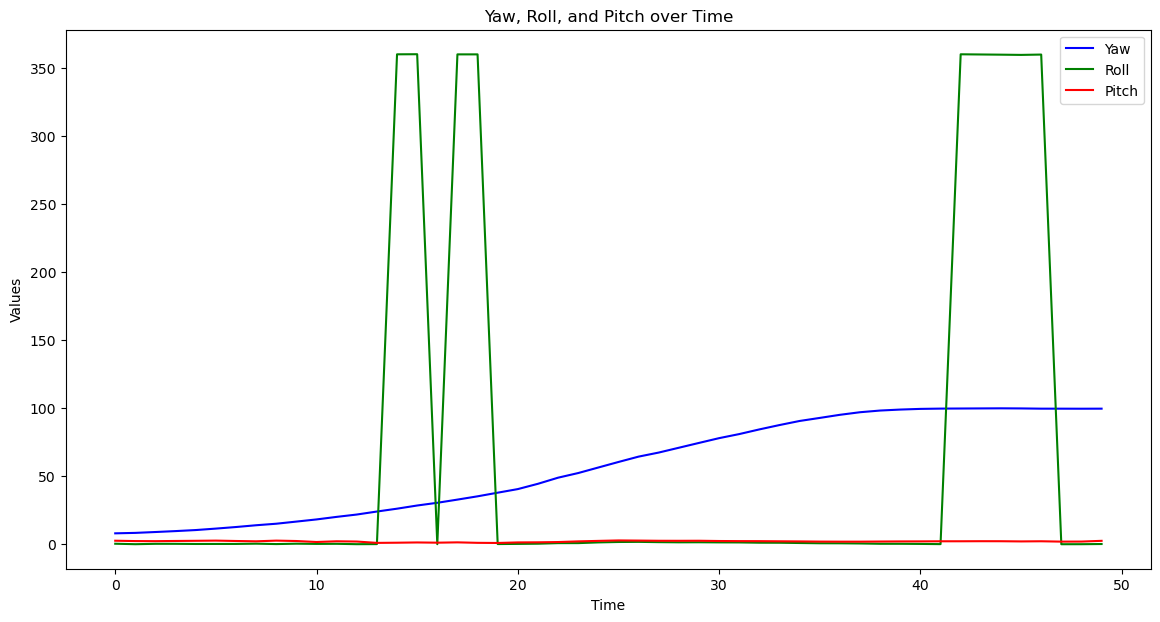

In [25]:
plt.figure(figsize=(14, 7))

# Plotting all three variables on the same plot
plt.plot(yaw, label='Yaw', color='blue')
plt.plot(roll, label='Roll', color='green')
plt.plot(pitch, label='Pitch', color='red')

# Adding title and labels
plt.title('Yaw, Roll, and Pitch over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

plt.show()

### 2.2. 속도 데이터 분석하기

추가적인 차량의 운동 상태 파악을 위해 속도 데이터를 중심으로 분석 진행

조향 데이터 분석과 같은 프로세스로 진행

In [26]:
# 종속 속도, 횡속도, 종속 가속도, 횡 가속도 데이터 추출
long_velocity = sorted_df['long_velocity']
lat_velocity = sorted_df['lat_velocity']
long_accel = sorted_df['long_accel']
lat_accel = sorted_df['lat_accel']

각각의 그래프를 개별적으로 확인하면 다음과 같음

* **Longitudinal Velocity :** 선형으로 속도가 오르다가 끝 부분에서 감속하는 그래프
* **Lateral Velocity :** 시작점은 높으나 점점 감속하는 그래프
* **Longitudinal Acceleration :** 전반적으로 양의 그래프를 보이나 점점 떨어지는 그래프 
* **Lateral Acceleration :** 전반적으로 0이하의 값들로 구성되어 있으며 점점 0으로 올라가는 그래프

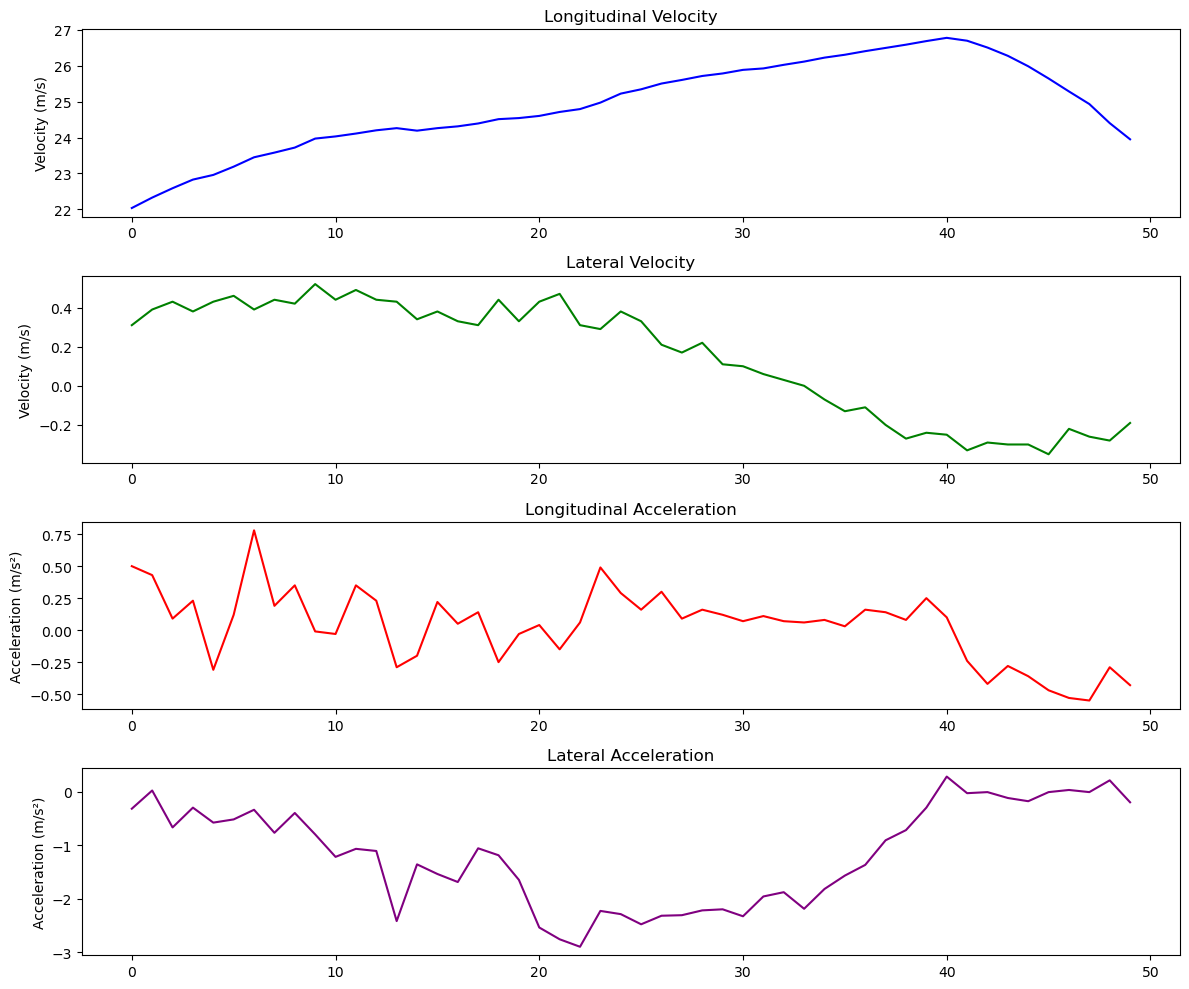

In [27]:
# 그래프 생성
fig, axs = plt.subplots(4, 1, figsize=(12, 10))

# 종속 속도 그래프
axs[0].plot(long_velocity, color='blue')

axs[0].set_title('Longitudinal Velocity')
axs[0].set_ylabel('Velocity (m/s)')

# 횡속도 그래프
axs[1].plot(lat_velocity, color='green')

axs[1].set_title('Lateral Velocity')
axs[1].set_ylabel('Velocity (m/s)')

# 종속 가속도 그래프
axs[2].plot(long_accel, color='red')

axs[2].set_title('Longitudinal Acceleration')
axs[2].set_ylabel('Acceleration (m/s²)')

# 횡 가속도 그래프
axs[3].plot(lat_accel, color='purple')

axs[3].set_title('Lateral Acceleration')
axs[3].set_ylabel('Acceleration (m/s²)')

# 그래프 레이아웃 조정
plt.tight_layout()
plt.show()

가속도는 그림과 같이 그리면 서로 영향이 없어 보일 수 있음

하지만 다음과 같이 그리면 속도와 가속도의 연관성을 확인 할 수 있음

다음 그래프를 보면 가속도의 막대그래프 방향과 길이에 따라 속도에 영향을 받고 있음을 확인 할 수 있음

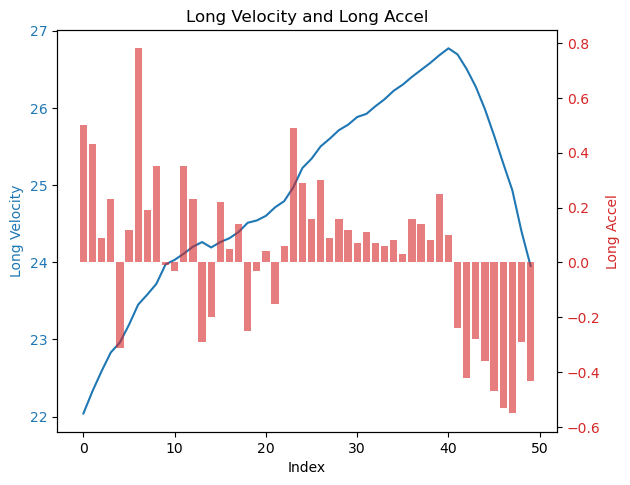

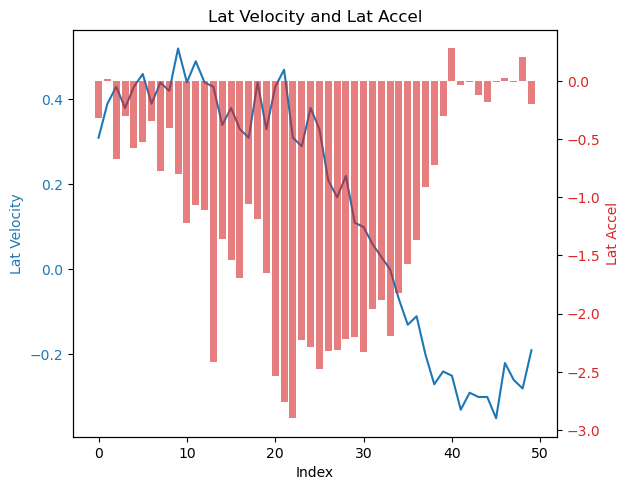

In [28]:
# 속도를 나타내는 long_velocity는 선그래프로 그리고 가속도를 나타내는 long_accel은 막대그래프로 그립니다. 
fig, ax1 = plt.subplots()

ax1.set_xlabel('Index')
ax1.set_ylabel('Long Velocity', color='tab:blue')
ax1.plot(long_velocity, color='tab:blue', label='Long Velocity')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Long Accel', color='tab:red')
ax2.bar(list(range(0,50)), long_accel, color='tab:red', alpha=0.6, label='Long Accel')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Long Velocity and Long Accel')
plt.show()


# 속도를 나타내는 lat_velocity는 선그래프로 그리고 가속도를 나타내는 lat_accel은 막대그래프로 그립니다. 
fig, ax1 = plt.subplots()

ax1.set_xlabel('Index')
ax1.set_ylabel('Lat Velocity', color='tab:blue')
ax1.plot(lat_velocity, color='tab:blue', label='Lat Velocity')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Lat Accel', color='tab:red')
ax2.bar(list(range(0,50)), lat_accel, color='tab:red', alpha=0.6, label='Lat Accel')
ax2.tick_params(axis='y', labelcolor='tab:red')

fig.tight_layout()
plt.title('Lat Velocity and Lat Accel')
plt.show()


그래프를 하나로 그려 전체적인 데이터를 확인한 결과 다음과 같은 결과를 확인 할 수 있음

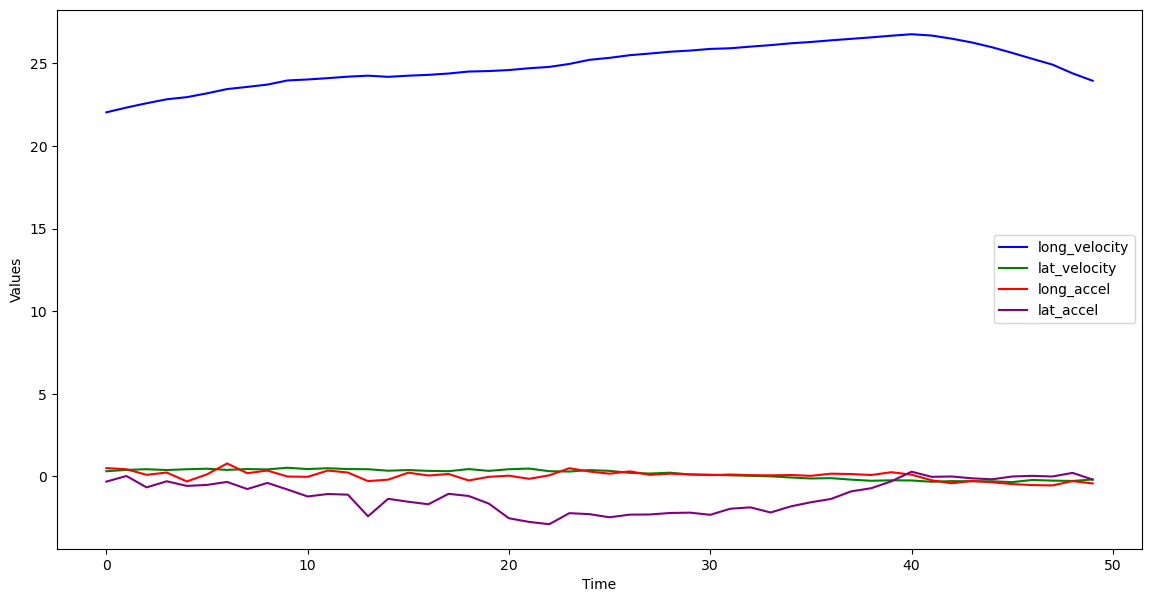

In [29]:
plt.figure(figsize=(14, 7))

# 속도와 가속도 변수를 하나의 그래프로 시각화
plt.plot(long_velocity, color='blue', label="long_velocity")
plt.plot(lat_velocity, color='green', label="lat_velocity")
plt.plot(long_accel, color='red', label="long_accel")
plt.plot(lat_accel, color='purple', label="lat_accel")

plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

plt.show()

가속도의 변동폭이 크지 않기 때문에 속도 위주의 분석을 위해 가속도를 제외해도 무리는 없음

분석 결과, 전진 속도(`long_velocity`) 는 조금씩 증가하다가 마지막에 감속하는 속도 변동이 크지 않는 주행 중인 것을 확인 할 수 있음

앞에서 조향 관련 데이터를 확인했을 때 Pitch 값을 분석했던 결과와 거의 유사한 것을 확인 할 수 있음

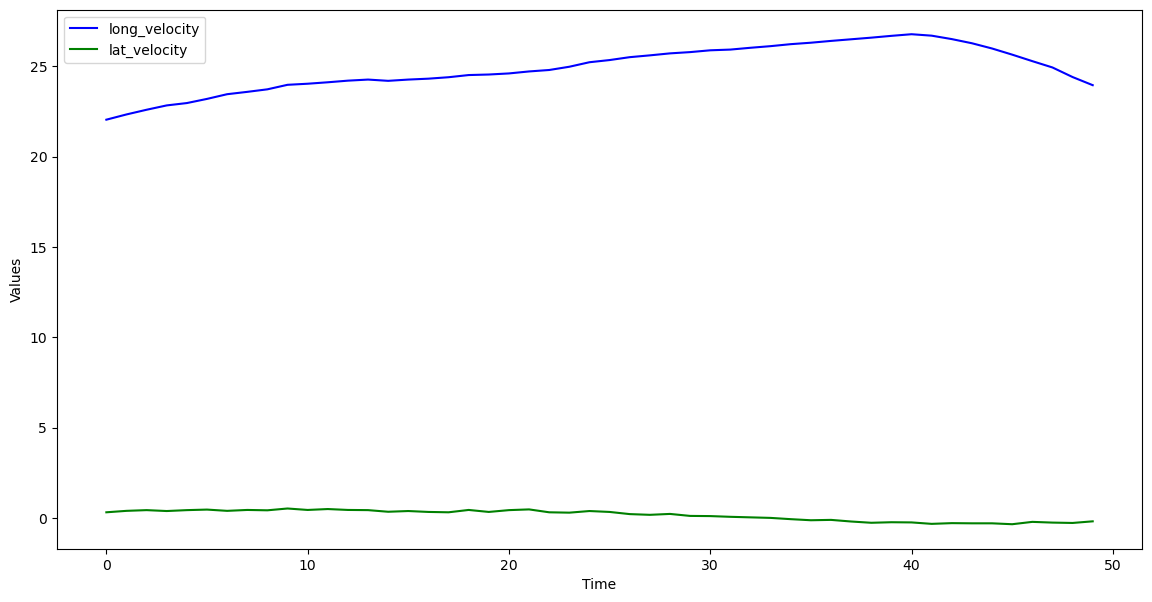

In [30]:
plt.figure(figsize=(14, 7))

# 속도 관련 데이터만 확인 (long_velocity: 파랑, lat_velocity: 초록 )
plt.plot(long_velocity, color='blue', label="long_velocity")
plt.plot(lat_velocity, color='green', label="lat_velocity")


plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()

plt.show()

### 2.3. 지도 경로 시각화

GPS의 위치 정보(위도, 경도)를 이용하여 주행 데이터의 경로를 분석 

메타데이터의 데이터프레임(`sorted_df`)에서 위도, 경도 데이터를 추출하면 다음과 같음

In [31]:
gps_data = sorted_df[['gps_latitude', 'gps_longitude']]
gps_data

,gps_latitude,gps_longitude
0,37.339685,127.108645
1,37.339687,127.108656
2,37.339688,127.108671
3,37.339690,127.108686
4,37.339692,127.108698
5,37.339694,127.108713
6,37.339696,127.108728
7,37.339698,127.108743
8,37.339701,127.108756
9,37.339704,127.108771


지난 실습에서 사용했던 `folium` 라이브러리를 사용하여 지도 시각화를 진행

경로를 결과를 확인한 결과, 위에서 예측한 것처럼 한 쪽으로 쏠리는 운동으로 예측할 수 있었는데 이와 일치하는 운동임을 확인

In [32]:
import folium

# 첫 번째 위치를 지도의 중심으로 설정
map_center = [gps_data.iloc[0]['gps_latitude'], gps_data.iloc[0]['gps_longitude']]

# 지도 생성
mymap = folium.Map(location=map_center, zoom_start=30)

# GPS 위치에 마커 추가
for idx, row in gps_data.iterrows():
    folium.Marker([row['gps_latitude'], row['gps_longitude']]).add_to(mymap)

mymap

`PolyLine` 을 이용해서 마커가 아닌 라인을 생성하면 경로를 더 명확하게 파악 할 수 있음

In [33]:
# 지도 생성 (이전과 동일한 중심 위치 사용)
map_with_lines = folium.Map(location=map_center, zoom_start=30)

# GPS 위치에 선으로 경로 추가
folium.PolyLine(gps_data.values, color="red", weight=5, opacity=1).add_to(map_with_lines)

map_with_lines

분석한 결과가 일치하는지 실제 운전 시 촬영한 원본 이미지 데이터를 확인하면 다음과 같음

![](img/source_img.gif)

### [TODO] 다른 시나리오의 주행 데이터 분석하기
* mission 폴더에 있는 데이터는 지금까지 분석한 주행 데이터와 <u>다른 시나리오에서 추출한 데이터</u>입니다. 
* 해당 데이터를 파싱하여 다양한 메타데이터를 분석하는 코드를 작성하세요.

먼저 해당 폴더에 있는 파일들을 확인하는 코드를 작성하세요.

In [35]:
import os

mission_scenario_folder = "./mission"


os.listdir(mission_scenario_folder)

['1656041452809_Merged-LDR-AR+Near_3DBB_GT.json',
 '1656041459809_Merged-LDR-AR+Near_3DBB_GT.json',
 '1656041456209_Merged-LDR-AR+Near_3DBB_GT.json',
 '1656041458409_Merged-LDR-AR+Near_3DBB_GT.json',
 '1656041455609_Merged-LDR-AR+Near_3DBB_GT.json',
 '1656041453409_Merged-LDR-AR+Near_3DBB_GT.json',
 '1656041455409_Merged-LDR-AR+Near_3DBB_GT.json',
 '1656041453609_Merged-LDR-AR+Near_3DBB_GT.json',
 '1656041458609_Merged-LDR-AR+Near_3DBB_GT.json',
 '1656041452610_Merged-LDR-AR+Near_3DBB_GT.json',
 '1656041450209_Merged-LDR-AR+Near_3DBB_GT.json',
 '1656041460009_Merged-LDR-AR+Near_3DBB_GT.json',
 '1656041455008_Merged-LDR-AR+Near_3DBB_GT.json',
 '1656041453809_Merged-LDR-AR+Near_3DBB_GT.json',
 '1656041458809_Merged-LDR-AR+Near_3DBB_GT.json',
 '1656041456611_Merged-LDR-AR+Near_3DBB_GT.json',
 '1656041451009_Merged-LDR-AR+Near_3DBB_GT.json',
 '1656041459409_Merged-LDR-AR+Near_3DBB_GT.json',
 '1656041452409_Merged-LDR-AR+Near_3DBB_GT.json',
 '1656041454409_Merged-LDR-AR+Near_3DBB_GT.json',


폴더 내에 있는 JSON 파일을 불러와 이를 데이터프레임으로 변환하는 코드를 작성해 주세요. 

특별한 패턴을 발견했다면 그 패턴을 이용한 코드를 작성해도 됩니다. 

In [43]:
# JSON 파일들의 경로를 매칭하는 패턴
mission_scenario_folder = './mission/*_Merged-LDR-AR+Near_3DBB_GT.json'

file_paths = glob.glob(mission_scenario_folder)

이를 이용하여 JSON 파일들을 하나의 데이터프레임으로 변환하는 코드를 작성하세요. 

위에서 작성한 `json_to_dataframe` 함수를 사용하셔도 괜찮습니다.

In [45]:
mission_all_dfs = []
all_annotations_dfs = []


for path in file_paths:
    mission_new_df, mission_new_annotations_df = json_to_dataframe(path)

    # 생성된 DataFrame을 all_dfs 리스트에 추가
    mission_all_dfs.append(mission_new_df)
    

    # annotations DataFrame이 None이 아닌 경우에만 all_annotations_dfs 리스트에 추가
    if mission_new_annotations_df is not None:
        all_annotations_dfs.append(mission_new_annotations_df)

In [47]:
mission_merged_df = pd.concat(mission_all_dfs, ignore_index=True)

결측치가 있는지 확인하는 코드를 작성하세요.

In [48]:
mission_merged_df.isnull().sum()

filename                  0
parent_path               0
unix_timestamp            0
file_format               0
capacity                  0
vehicle_id                0
region_name               0
location                  0
length                    0
framerate                 0
size                      0
data_purpose              0
time                      0
road_feature              0
road_type                 0
location_feature          0
driving_scenario          0
ego_long_vel_level        0
season                    0
crowd_level               0
scene_att                 0
weather                   0
contamination             0
cloudiness                0
darkness_level            0
backlight                 0
road_surface_type         0
road_surface_features     0
road_surface_condition    0
shadow_in_line            0
damaged_line              0
sensor_name               0
sensor_hfov               0
sensor_vfov               0
gps_mode                  0
gps_latitude        

`unix_timestamp` 를 기준으로 정렬하는 코드를 작성하세요.

인덱스를 초기화하지 않으면 추후 분석 중에 문제가 발생할 수 있습니다. 

In [49]:
mission_merged_df["unix_timestamp"].sort_values().reset_index(drop=True)

0     1656041450209
1     1656041450409
2     1656041450609
3     1656041450809
4     1656041451009
5     1656041451209
6     1656041451409
7     1656041451609
8     1656041451809
9     1656041452009
10    1656041452209
11    1656041452409
12    1656041452610
13    1656041452809
14    1656041453009
15    1656041453209
16    1656041453409
17    1656041453609
18    1656041453809
19    1656041454009
20    1656041454209
21    1656041454409
22    1656041454608
23    1656041454808
24    1656041455008
25    1656041455209
26    1656041455409
27    1656041455609
28    1656041455808
29    1656041456008
30    1656041456209
31    1656041456409
32    1656041456611
33    1656041456809
34    1656041457009
35    1656041457212
36    1656041457409
37    1656041457609
38    1656041457809
39    1656041458009
40    1656041458209
41    1656041458409
42    1656041458609
43    1656041458809
44    1656041459009
45    1656041459209
46    1656041459409
47    1656041459609
48    1656041459809
49    1656041460009


변환된 데이터프레임을 CSV로 저장하는 코드를 작성해 주세요.

데이터프레임에는 아래의 컬럼과 해당 데이터만 있어야 합니다. 순서가 다르면 오답으로 처리될 수 있습니다.

1. yaw
2. roll
3. pitch
4. long_velocity
5. lat_velocity
6. gps_latitude
7. gps_longitude

저장되는 CSV의 이름은 `result.csv` 여야 하며 인덱스는 저장되면 안됩니다. 

In [51]:
mission_merged_df[['yaw', 'roll', 'pitch', 'long_velocity', 'lat_velocity', 'gps_latitude', 'gps_longitude']].to_csv('result.csv', index=False)

해당 데이터프레임을 이용하여 조향 데이터 그래프를 생성하는 코드를 작성해 주세요.

첨부된 그래프와 같아야 하며 <u>대소문자, 순서, 색상 등 다를 경우 채점에 문제가 발생할 수 있습니다.</u>

* 전체 그래프 사이즈 : 12, 8
* 전체 그래프 구조 : 3행 1열

**첫 번째 행 그래프 :** Yaw 그래프 
* 색상 : blue
* 그래프 제목 : Yaw
* y label : Value

**두 번째 행 그래프 :** Roll 그래프 
* 색상 :  green
* 그래프 제목 : Roll
* y label : Value

**세 번째 행 그래프 :** Pitch 그래프 
* 색상 :  red
* 그래프 제목 : Pitch
* y label : Value


**[출력되어야 하는 결과물]**

![](img/mission1.png)

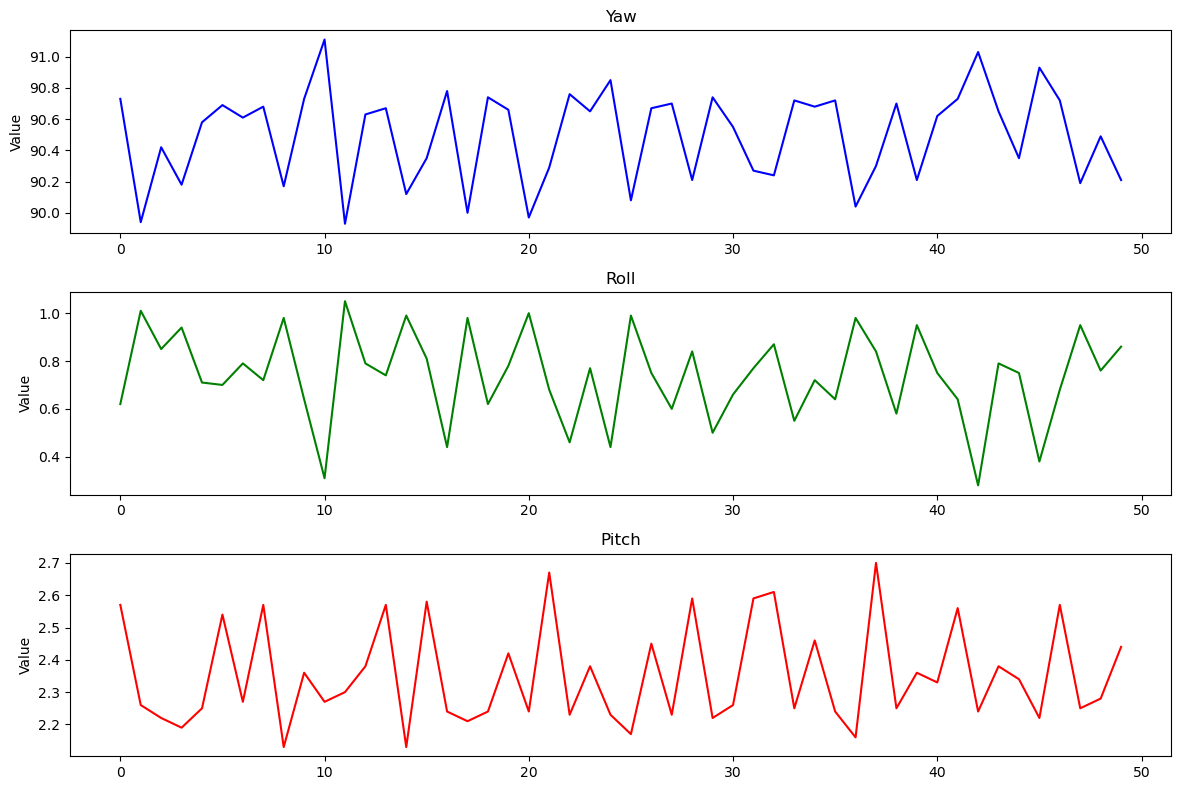

<Figure size 640x480 with 0 Axes>

In [52]:
import matplotlib.pyplot as plt

# 전체 그래프 크기 설정
fig, axs = plt.subplots(3, 1, figsize=(12, 8))

# 첫 번째 행: Yaw 그래프
axs[0].plot(mission_merged_df['yaw'], color='blue')
axs[0].set_title('Yaw')
axs[0].set_ylabel('Value')

# 두 번째 행: Roll 그래프
axs[1].plot(mission_merged_df['roll'], color='green')
axs[1].set_title('Roll')
axs[1].set_ylabel('Value')

# 세 번째 행: Pitch 그래프
axs[2].plot(mission_merged_df['pitch'], color='red')
axs[2].set_title('Pitch')
axs[2].set_ylabel('Value')

# 레이아웃 조정
plt.tight_layout()

# 그래프 출력
plt.show()



# 그래프 레이아웃 조정
plt.tight_layout()

# 채점을 위한 그래프 저장 코드 (수정 금지)
plt.savefig("result.png")
plt.show()